In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Dataset Description

The dataset contains sales figures of Avocados in different regions in the US over different periods. The dataset can be used to predict average price of Avocados for a region at any day, it can also be used to predict the region using the remaining features in the dataset

# Features Description

In [2]:
df = pd.read_csv("avocados.csv",parse_dates=["Date"])
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.shape

(1517, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    1517 non-null   int64         
 1   Date          1517 non-null   datetime64[ns]
 2   AveragePrice  1517 non-null   float64       
 3   Total Volume  1517 non-null   float64       
 4   4046          1517 non-null   float64       
 5   4225          1517 non-null   float64       
 6   4770          1517 non-null   float64       
 7   Total Bags    1517 non-null   float64       
 8   Small Bags    1517 non-null   float64       
 9   Large Bags    1517 non-null   float64       
 10  XLarge Bags   1517 non-null   float64       
 11  type          1517 non-null   object        
 12  year          1517 non-null   int64         
 13  region        1517 non-null   object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 166.0+ KB


let's drop the Unnamed: 0 featrue which is an index column

In [5]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [6]:
df.shape

(1517, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1517 non-null   datetime64[ns]
 1   AveragePrice  1517 non-null   float64       
 2   Total Volume  1517 non-null   float64       
 3   4046          1517 non-null   float64       
 4   4225          1517 non-null   float64       
 5   4770          1517 non-null   float64       
 6   Total Bags    1517 non-null   float64       
 7   Small Bags    1517 non-null   float64       
 8   Large Bags    1517 non-null   float64       
 9   XLarge Bags   1517 non-null   float64       
 10  type          1517 non-null   object        
 11  year          1517 non-null   int64         
 12  region        1517 non-null   object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 154.2+ KB


Let's look into the distribution of the features

Text(0.5, 1.0, 'Average Price - Histogram')

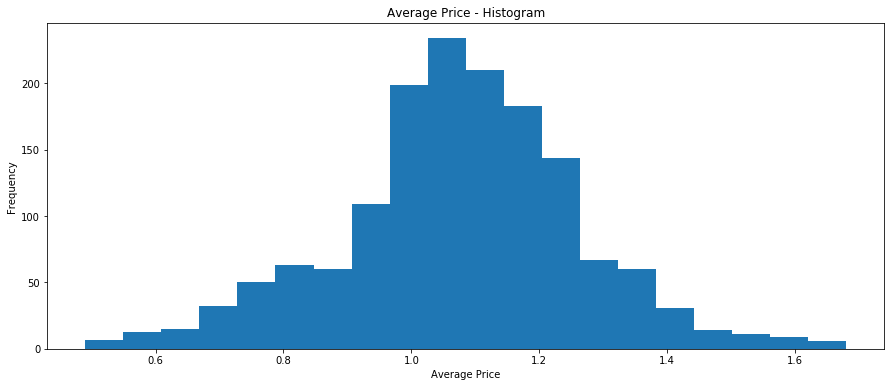

In [10]:
plt.figure(figsize=(15,6))
plt.hist(df["AveragePrice"],bins=20)
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.title('Average Price - Histogram')

The average price variable approximates a normal disribution

Text(0.5, 1.0, 'Total Volume - Histogram')

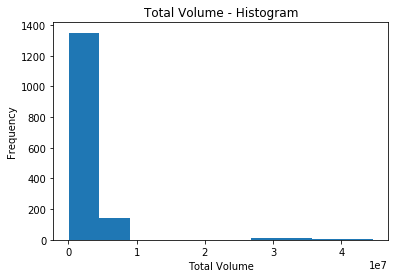

In [11]:
plt.hist(df["Total Volume"])
plt.xlabel('Total Volume')
plt.ylabel('Frequency')
plt.title('Total Volume - Histogram')

The total volume feature has a very large range

In [12]:
df[df["Total Volume"] == df["Total Volume"].max()]

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1202,2015-01-02,0.89,44655461.51,18933038.04,18956479.74,1381516.11,5384427.62,4216452.03,1121076.47,46899.12,conventional,2015,TotalUS


We need to get rid of the total US entries which are skewing up the distribution

In [13]:
df.shape

(1517, 13)

In [14]:
df = df.drop(df[(df['region'] == "TotalUS")].index)

In [15]:
df.shape

(1492, 13)

Text(0.5, 1.0, 'Total Volume - Histogram')

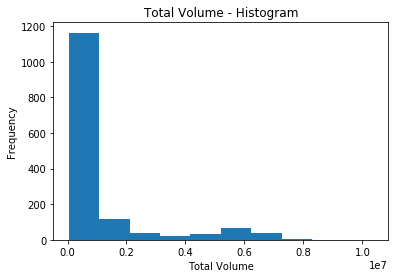

In [16]:
plt.hist(df["Total Volume"])
plt.xlabel('Total Volume')
plt.ylabel('Frequency')
plt.title('Total Volume - Histogram')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1492 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1492 non-null   datetime64[ns]
 1   AveragePrice  1492 non-null   float64       
 2   Total Volume  1492 non-null   float64       
 3   4046          1492 non-null   float64       
 4   4225          1492 non-null   float64       
 5   4770          1492 non-null   float64       
 6   Total Bags    1492 non-null   float64       
 7   Small Bags    1492 non-null   float64       
 8   Large Bags    1492 non-null   float64       
 9   XLarge Bags   1492 non-null   float64       
 10  type          1492 non-null   object        
 11  year          1492 non-null   int64         
 12  region        1492 non-null   object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 163.2+ KB


In [18]:
df["type"].value_counts()

conventional    1492
Name: type, dtype: int64

This column does not have any info for the models so let's drop it

In [19]:
df.drop("type",axis=1,inplace=True)

In [20]:
df.shape

(1492, 12)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1492 entries, 0 to 1516
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1492 non-null   datetime64[ns]
 1   AveragePrice  1492 non-null   float64       
 2   Total Volume  1492 non-null   float64       
 3   4046          1492 non-null   float64       
 4   4225          1492 non-null   float64       
 5   4770          1492 non-null   float64       
 6   Total Bags    1492 non-null   float64       
 7   Small Bags    1492 non-null   float64       
 8   Large Bags    1492 non-null   float64       
 9   XLarge Bags   1492 non-null   float64       
 10  year          1492 non-null   int64         
 11  region        1492 non-null   object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(1)
memory usage: 151.5+ KB


In [22]:
df["year"].value_counts()

2015    1245
2016     247
Name: year, dtype: int64

Most of the data are from the year 2015

In [23]:
df["region"].nunique()

50

In [24]:
df["region"].value_counts()

California             76
Albany                 67
BaltimoreWashington    65
Boise                  65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Louisville             34
Tampa                  34
Charlotte              31
Portland               30
NorthernNewEngland     29
Houston                29
WestTexNewMexico       27
Nashville              25
Denver                 24
SouthCarolina          24
GrandRapids            23
Chicago                23
Pittsburgh             22
Orlando                21
RichmondNorfolk        21
HarrisburgScranton     19
Syracuse               19
Midsouth               18
GreatLakes             18
DallasFtWorth          17
MiamiFtLauderdale      17
Roanoke                17
StLouis     

Most of the data are from california and the least data points are from Los Angeles

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1492 entries, 0 to 1516
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1492 non-null   datetime64[ns]
 1   AveragePrice  1492 non-null   float64       
 2   Total Volume  1492 non-null   float64       
 3   4046          1492 non-null   float64       
 4   4225          1492 non-null   float64       
 5   4770          1492 non-null   float64       
 6   Total Bags    1492 non-null   float64       
 7   Small Bags    1492 non-null   float64       
 8   Large Bags    1492 non-null   float64       
 9   XLarge Bags   1492 non-null   float64       
 10  year          1492 non-null   int64         
 11  region        1492 non-null   object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(1)
memory usage: 151.5+ KB


In [26]:
region1 = df.groupby(['region'],sort = True).mean()
region1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
region,,,,,,,,,,
Albany,1.238657,7.629020e+04,1.732056e+03,6.185452e+04,537.329104,1.216629e+04,1.181550e+04,347.246866,3.547164,2015.223881
Atlanta,1.012037,4.676372e+05,3.214885e+05,5.904953e+04,881.809444,8.621736e+04,4.740999e+04,38747.062407,60.306481,2015.277778
BaltimoreWashington,1.160923,8.076442e+05,5.863856e+04,5.261738e+05,38148.926769,1.846829e+05,1.801890e+05,4221.447231,272.483077,2015.369231
Boise,0.974923,8.104617e+04,4.279847e+04,6.462111e+03,5731.225385,2.605436e+04,2.526996e+04,748.342154,36.056308,2015.615385
Boston,1.205484,5.534586e+05,7.450542e+03,4.024276e+05,21224.216935,1.223562e+05,1.210160e+05,764.848710,575.326935,2015.709677
BuffaloRochester,1.301569,1.321844e+05,1.576289e+03,6.379754e+04,195.697255,6.661483e+04,6.554765e+04,384.352549,682.826667,2015.823529
California,1.055921,6.035277e+06,2.410017e+06,1.984823e+06,225314.512500,1.415122e+06,1.286774e+06,109555.190526,18792.960132,2015.684211
Charlotte,1.311613,1.762781e+05,4.332415e+04,4.502836e+04,29937.738710,5.798790e+04,5.270983e+04,5230.527742,47.535806,2015.483871
Chicago,1.214783,8.118822e+05,3.814420e+04,5.681663e+05,107273.196087,9.829844e+04,9.470367e+04,3061.164348,533.601304,2015.000000


Text(0.5, 1.0, 'Average Price vs Region')

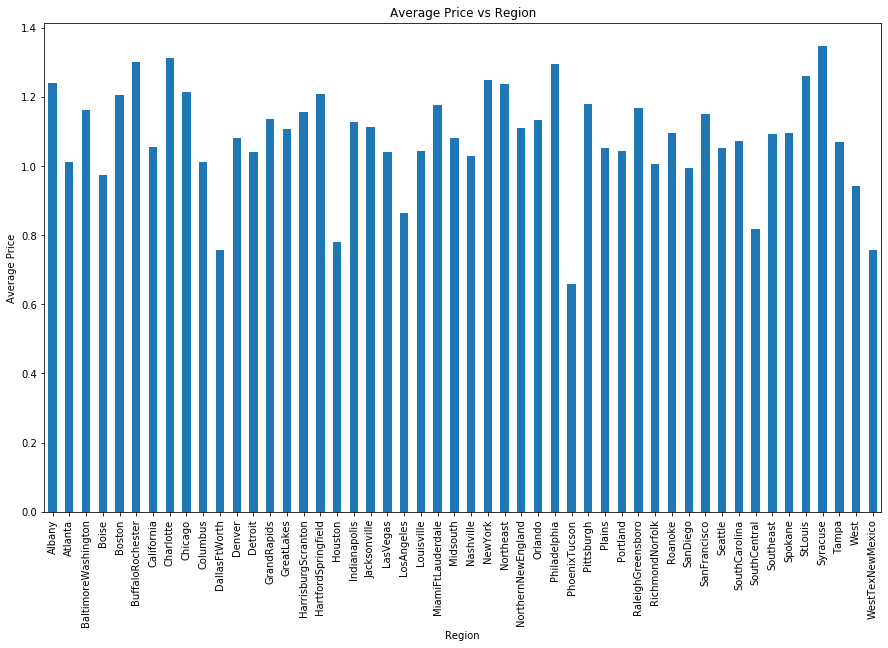

In [28]:
plt.figure(figsize=(15,9))
region1["AveragePrice"].plot.bar()
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price vs Region')

In [29]:
region1[region1["AveragePrice"] == region1["AveragePrice"].max()]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
region,,,,,,,,,,
Syracuse,1.347368,48578.412105,1105.586842,24699.908421,27.195263,22745.721579,22575.271579,170.45,0.0,2015.0


Average price of Avocados is highest at Syracuse

In [30]:
region1[region1["AveragePrice"] == region1["AveragePrice"].min()]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
region,,,,,,,,,,
PhoenixTucson,0.659808,1.088699e+06,774405.7075,214330.743462,8291.529038,91670.657308,73751.935385,17906.916538,11.805385,2015.0


Average price of Avocados is least at Phoenix Tucson

Text(0.5, 1.0, 'Daily Average Total Volume vs Region')

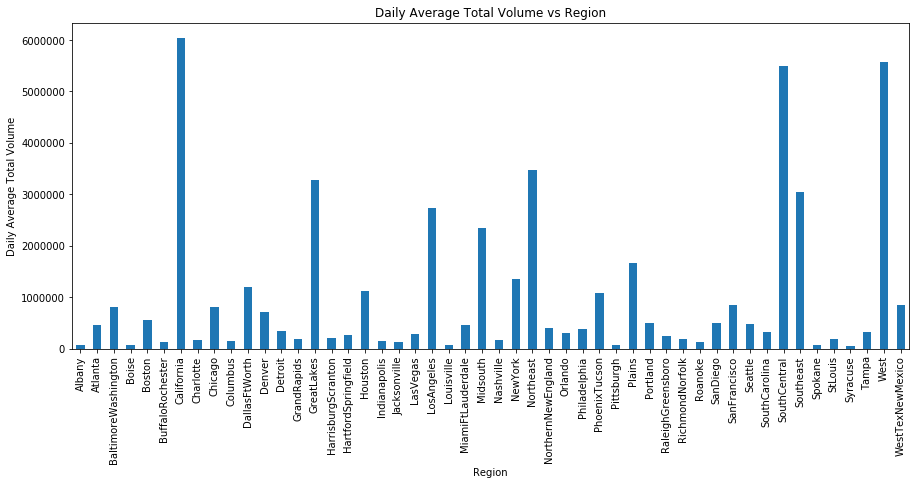

In [64]:
plt.figure(figsize=(15,6))
region1["Total Volume"].plot.bar()
plt.xlabel('Region')
plt.ylabel('Daily Average Total Volume')
plt.title('Daily Average Total Volume vs Region')

In [32]:
region1["Total Volume"].nlargest(3)

region
California      6.035277e+06
West            5.574939e+06
SouthCentral    5.496995e+06
Name: Total Volume, dtype: float64

Daily Average Total Volume sales of Avocados is maximun in California followed by West

In [33]:
region1[region1["Total Volume"] == region1["Total Volume"].min()]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
region,,,,,,,,,,
Syracuse,1.347368,48578.412105,1105.586842,24699.908421,27.195263,22745.721579,22575.271579,170.45,0.0,2015.0


In [34]:
region1["Total Volume"].nsmallest(3)

region
Syracuse    48578.412105
Albany      76290.195373
Spokane     77184.531224
Name: Total Volume, dtype: float64

Daily Average Total Volume sales of Avocados is least in Syracuse followed by Albany

In [35]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany


In [36]:
df['month'] = pd.DatetimeIndex(df['Date']).month
df['weekday'] = pd.DatetimeIndex(df['Date']).weekday

In [37]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,month,weekday
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany,12,6
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany,12,6
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany,12,6
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany,6,4
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany,11,6


In [38]:
df["weekday"].value_counts()

6    976
0    145
4    126
1    111
5     58
3     53
2     23
Name: weekday, dtype: int64

maximum number of the days in the dataset were sundays (976) and minimum number of days were Wednesdays (23)

In [39]:
df["month"].value_counts()

5     156
8     155
3     154
1     137
12    135
6     132
11    130
4     121
2      98
10     97
9      91
7      86
Name: month, dtype: int64

maximum number of the days in the dataset fall in May (156) and minimum number of days fall in July (86)

In [40]:
weekday = df.groupby(['weekday']).mean()
weekday

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month
weekday,,,,,,,,,,,
0,1.082759,1.044510e+06,458863.289034,382299.907793,33706.230897,169640.255517,143206.453724,25258.302621,1175.499172,2015.020690,8.027586
1,1.035586,1.223637e+06,439168.140631,494059.449730,46566.905225,243842.005586,200596.213333,41441.419279,1804.372973,2015.243243,7.810811
2,1.057391,1.273456e+06,533300.155652,455630.682174,20068.227826,264457.106522,230757.713043,31012.440870,2686.952609,2015.260870,4.260870
3,1.015283,1.352435e+06,615978.313396,518320.955849,39741.785094,178393.630000,147613.011132,29936.365094,844.253774,2015.000000,3.867925
4,1.034286,1.124040e+06,407756.700317,440241.593571,37373.703492,238668.083492,198450.501587,38266.759524,1950.822381,2015.222222,6.380952
5,1.123276,1.176500e+06,363575.405517,482700.535345,37231.240172,292993.213621,257077.194655,32453.457759,3462.561207,2015.500000,4.568966
6,1.085984,1.033309e+06,401989.817203,394351.418873,34037.036055,202930.963576,172474.418033,28619.937551,1836.607992,2015.157787,6.279713


Text(0.5, 1.0, 'Average Price on any Weekday')

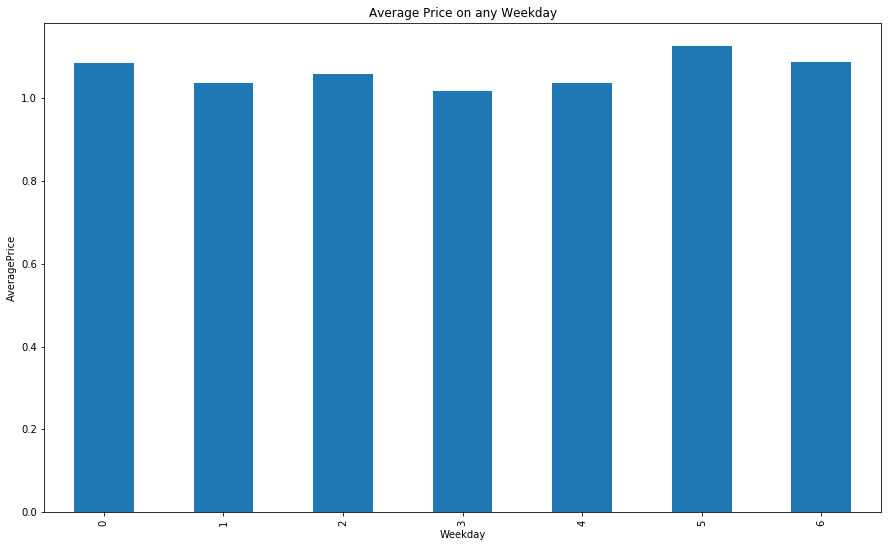

In [41]:
plt.figure(figsize=(15,9))
weekday["AveragePrice"].plot.bar()
plt.xlabel('Weekday')
plt.ylabel('AveragePrice')
plt.title('Average Price on any Weekday')

In [42]:
weekday["AveragePrice"].nlargest(3)

weekday
5    1.123276
6    1.085984
0    1.082759
Name: AveragePrice, dtype: float64

In [43]:
weekday["AveragePrice"].nsmallest(3)

weekday
3    1.015283
4    1.034286
1    1.035586
Name: AveragePrice, dtype: float64

Average price of avocados is relatively higher on weekends and minimum on Thursday

Text(0.5, 1.0, 'Daily Average Total Volume Sales on any Weekday')

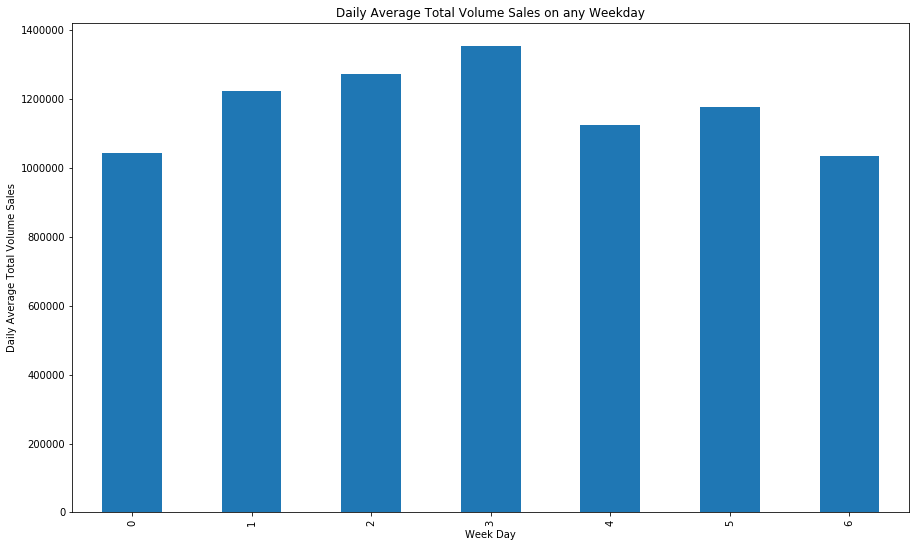

In [63]:
plt.figure(figsize=(15,9))
weekday["Total Volume"].plot.bar()
plt.xlabel('Week Day')
plt.ylabel('Daily Average Total Volume Sales')
plt.title('Daily Average Total Volume Sales on any Weekday')

In [47]:
weekday["Total Volume"].nlargest(3)

weekday
3    1.352435e+06
2    1.273456e+06
1    1.223637e+06
Name: Total Volume, dtype: float64

In [48]:
weekday["Total Volume"].nsmallest(3)

weekday
6    1.033309e+06
0    1.044510e+06
4    1.124040e+06
Name: Total Volume, dtype: float64

Average volume of sales of avocados is maximum on Thursday and minimum on Sunday & Monday

In [49]:
month = df.groupby(['month']).mean()
month

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,weekday
month,,,,,,,,,,,
1,1.036423,9.909898e+05,357659.316642,405297.013431,28202.769635,199830.718321,163980.357372,34658.555693,1191.805255,2015.160584,5.233577
2,1.107041,9.578724e+05,358809.636224,352422.236327,30138.172755,216502.318571,188605.945000,26731.661429,1164.712143,2015.224490,5.836735
3,1.068377,9.941670e+05,334234.136818,421108.498442,36378.256494,202446.141039,175731.600779,25155.942078,1558.598182,2015.207792,5.058442
4,1.072893,1.051675e+06,422682.510248,397392.514628,34971.505868,196628.703388,166004.780579,29025.228347,1598.694463,2015.173554,4.834711
5,1.071538,1.209162e+06,543697.758333,421798.822308,44213.360128,199452.136987,172685.432628,25138.463397,1628.240962,2015.115385,4.237179
6,1.048106,1.253661e+06,535000.843939,447978.090227,39550.574848,231131.227045,195641.491591,33815.021591,1674.713864,2015.128788,4.780303
7,1.086628,1.448243e+06,592908.109186,527737.927326,50614.458488,276982.898605,237187.183372,36915.621860,2880.093372,2015.209302,3.906977
8,1.072065,1.053866e+06,409143.412000,417542.481806,30678.207935,196502.188323,168641.492581,26130.788000,1729.907742,2015.109677,4.090323
9,1.074176,1.127477e+06,410843.135824,478261.164945,33366.515824,205005.924945,166835.757143,36009.258242,2160.909560,2015.131868,4.747253


Text(0.5, 1.0, 'Average Price on any Month')

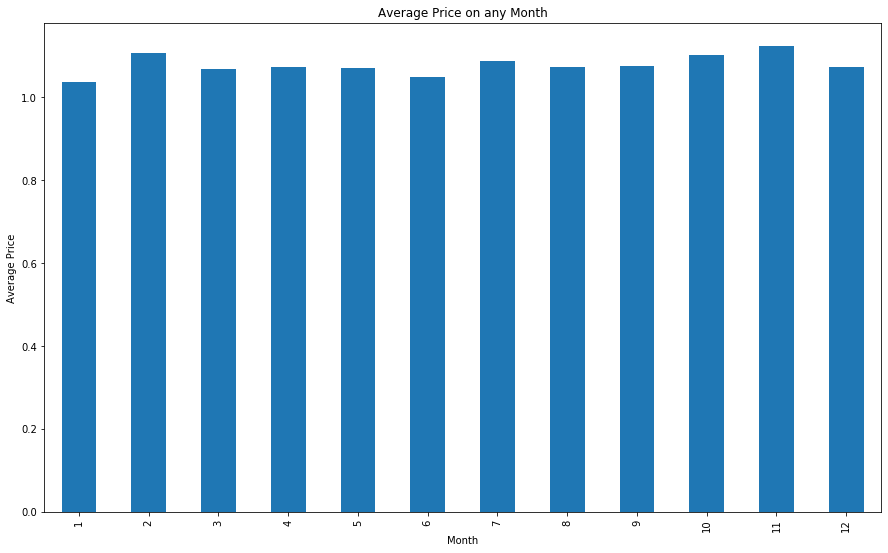

In [51]:
plt.figure(figsize=(15,9))
month["AveragePrice"].plot.bar()
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Price on any Month')

In [52]:
month["AveragePrice"].nlargest(3)

month
11    1.123231
2     1.107041
10    1.101237
Name: AveragePrice, dtype: float64

Average price was highest in the month of November followed by February

In [53]:
month["AveragePrice"].nsmallest(3)

month
1    1.036423
6    1.048106
3    1.068377
Name: AveragePrice, dtype: float64

Average price was least in the month of January followed by June

Text(0.5, 1.0, 'Daily Average Total Volume Sales on any Month')

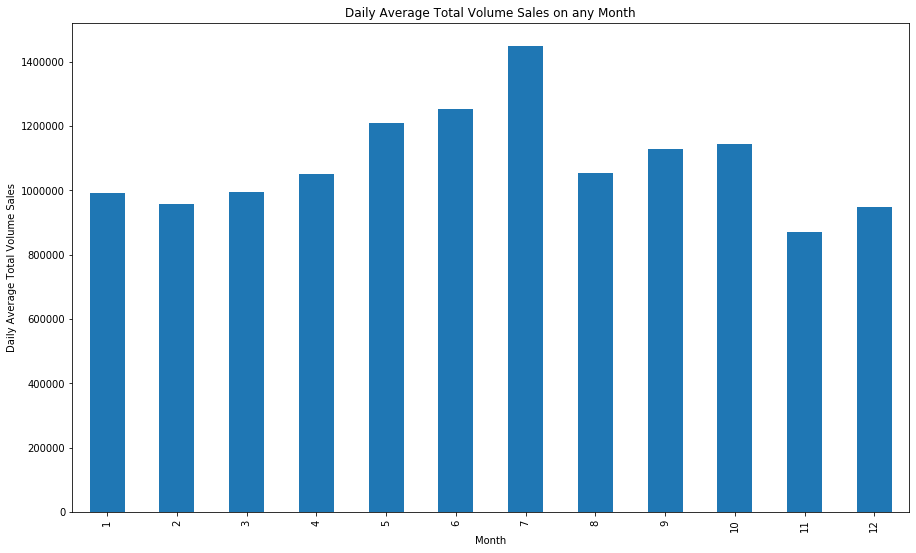

In [62]:
plt.figure(figsize=(15,9))
month["Total Volume"].plot.bar()
plt.xlabel('Month')
plt.ylabel('Daily Average Total Volume Sales')
plt.title('Daily Average Total Volume Sales on any Month')

In [55]:
month["Total Volume"].nlargest(3)

month
7    1.448243e+06
6    1.253661e+06
5    1.209162e+06
Name: Total Volume, dtype: float64

Daily average sales were highest in July followed by June

In [56]:
month["Total Volume"].nsmallest(3)

month
11    871325.976769
12    947046.298815
2     957872.363878
Name: Total Volume, dtype: float64

Daily average sales were least in November followed by December

In [57]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,month,weekday
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany,12,6
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany,12,6
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany,12,6
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany,6,4
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany,11,6


In [58]:
year = df.groupby(['year']).mean()
year

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,month,weekday
year,,,,,,,,,,,
2015,1.061084,9.810076e+05,409180.011108,379396.071992,30528.871566,161902.687341,132047.962345,28837.784056,1016.940940,6.414458,4.615261
2016,1.151498,1.559787e+06,467907.936154,583929.347895,59532.042389,448417.955992,404909.278664,37636.822105,5871.855223,6.259109,4.939271


Text(0.5, 1.0, 'Average Price vs Year')

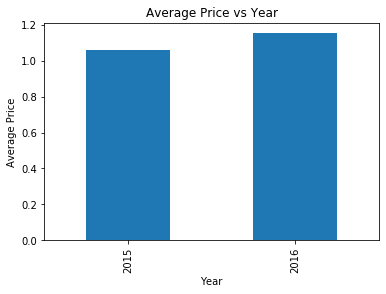

In [65]:
year["AveragePrice"].plot.bar()
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Price vs Year')

Average price of Avocados were relatively higher in the  year 2016

Text(0.5, 1.0, 'Daily Average Total Volume Sales vs Year')

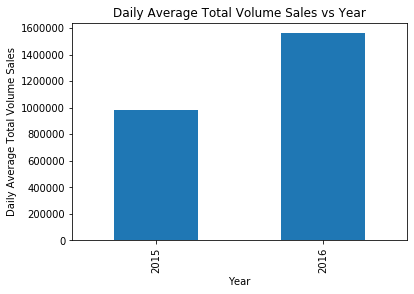

In [70]:
year["Total Volume"].plot.bar()
plt.xlabel('Year')
plt.ylabel('Daily Average Total Volume Sales')
plt.title('Daily Average Total Volume Sales vs Year')

Average daily volume of sales of Avocados were much higher in the  year 2016

In [71]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,month,weekday,day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany,12,6,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany,12,6,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany,12,6,13
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany,6,4,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany,11,6,29


In [72]:
df['day'] = pd.DatetimeIndex(df['Date']).day
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,month,weekday,day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany,12,6,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany,12,6,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany,12,6,13
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany,6,4,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany,11,6,29


In [73]:
day = df.groupby(['day']).mean()
day

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month,weekday
day,,,,,,,,,,,,
1,1.066444,1.100197e+06,402878.376444,436746.513333,22982.551333,237589.704667,199096.917111,37704.439556,788.348000,2015.222222,7.355556,3.822222
2,0.978727,1.063881e+06,402976.318727,442455.040727,22509.800000,195939.424000,161375.002545,33923.673455,640.748000,2015.109091,4.963636,5.054545
3,1.079531,7.933806e+05,251259.803906,345001.241406,26045.845625,171073.740000,145706.574687,23822.701875,1544.463438,2015.093750,4.640625,2.640625
4,1.079359,9.377543e+05,390053.905385,344958.721410,34381.322821,168360.364359,146167.852564,21382.139744,810.372051,2015.153846,8.192308,2.076923
5,1.009726,1.340564e+06,565217.418767,520247.572877,41119.812055,213979.441781,167638.557808,45213.976027,1126.907945,2015.164384,6.219178,1.643836
6,1.050000,1.465538e+06,631012.750833,496355.402222,63579.810556,274589.944167,235756.472778,35207.082500,3626.388889,2015.222222,7.333333,0.555556
7,1.075400,1.431588e+06,627219.412800,504629.887200,45002.112400,254736.439800,222410.820800,29794.742000,2530.877000,2015.120000,8.120000,1.620000
8,1.102609,1.237967e+06,542235.326304,472334.016087,33583.798913,189813.846087,161394.393478,26954.518696,1464.933913,2015.065217,5.673913,3.478261
9,1.033600,1.655430e+06,652330.366400,633432.393200,48109.016800,321557.991600,279546.112400,39030.359600,2981.519600,2015.200000,6.160000,1.560000


Text(0.5, 1.0, 'Average Price vs Day of Month')

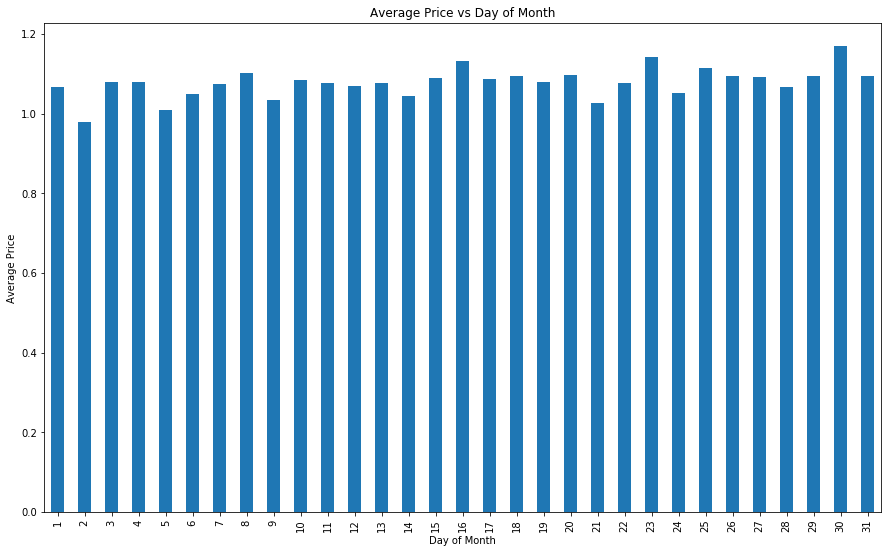

In [75]:
plt.figure(figsize=(15,9))
day["AveragePrice"].plot.bar()
plt.xlabel('Day of Month')
plt.ylabel('Average Price')
plt.title('Average Price vs Day of Month')

In [76]:
day["AveragePrice"].nlargest(3)

day
30    1.169583
23    1.142500
16    1.131600
Name: AveragePrice, dtype: float64

In [77]:
day["AveragePrice"].nsmallest(3)

day
2     0.978727
5     1.009726
21    1.027941
Name: AveragePrice, dtype: float64

Text(0.5, 1.0, 'Daily Average Total Volume Sales vs Day of Month')

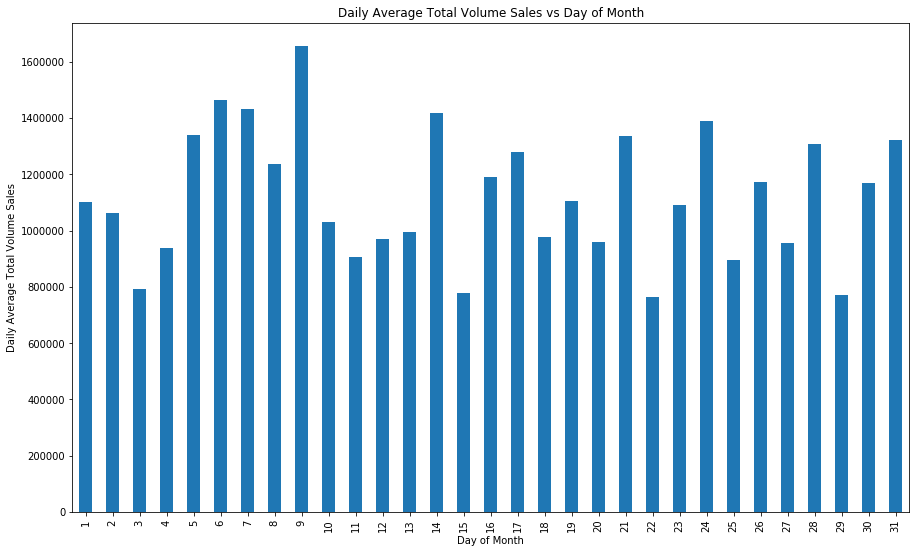

In [78]:
plt.figure(figsize=(15,9))
day["Total Volume"].plot.bar()
plt.xlabel('Day of Month')
plt.ylabel('Daily Average Total Volume Sales')
plt.title('Daily Average Total Volume Sales vs Day of Month')

In [79]:
df["day"].value_counts()

22    86
15    84
4     78
5     73
3     64
29    57
2     55
19    55
26    54
20    53
13    53
27    52
25    51
7     50
18    50
11    49
10    48
8     46
1     45
17    42
24    41
6     36
31    36
14    35
12    34
21    34
28    33
9     25
16    25
30    24
23    24
Name: day, dtype: int64

In [80]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,month,weekday,day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany,12,6,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany,12,6,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany,12,6,13
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany,6,4,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany,11,6,29


In [81]:
df.drop("day",axis=1,inplace=True)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1492 entries, 0 to 1516
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1492 non-null   datetime64[ns]
 1   AveragePrice  1492 non-null   float64       
 2   Total Volume  1492 non-null   float64       
 3   4046          1492 non-null   float64       
 4   4225          1492 non-null   float64       
 5   4770          1492 non-null   float64       
 6   Total Bags    1492 non-null   float64       
 7   Small Bags    1492 non-null   float64       
 8   Large Bags    1492 non-null   float64       
 9   XLarge Bags   1492 non-null   float64       
 10  year          1492 non-null   int64         
 11  region        1492 non-null   object        
 12  month         1492 non-null   int64         
 13  weekday       1492 non-null   int64         
dtypes: datetime64[ns](1), float64(9), int64(3), object(1)
memory usage: 174.8+ KB


In [83]:
df.drop("Date",axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1492 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  1492 non-null   float64
 1   Total Volume  1492 non-null   float64
 2   4046          1492 non-null   float64
 3   4225          1492 non-null   float64
 4   4770          1492 non-null   float64
 5   Total Bags    1492 non-null   float64
 6   Small Bags    1492 non-null   float64
 7   Large Bags    1492 non-null   float64
 8   XLarge Bags   1492 non-null   float64
 9   year          1492 non-null   int64  
 10  region        1492 non-null   object 
 11  month         1492 non-null   int64  
 12  weekday       1492 non-null   int64  
dtypes: float64(9), int64(3), object(1)
memory usage: 163.2+ KB


In [84]:
df = df.astype({"year": 'object', "month": 'object', "weekday": 'object'})

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1492 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  1492 non-null   float64
 1   Total Volume  1492 non-null   float64
 2   4046          1492 non-null   float64
 3   4225          1492 non-null   float64
 4   4770          1492 non-null   float64
 5   Total Bags    1492 non-null   float64
 6   Small Bags    1492 non-null   float64
 7   Large Bags    1492 non-null   float64
 8   XLarge Bags   1492 non-null   float64
 9   year          1492 non-null   object 
 10  region        1492 non-null   object 
 11  month         1492 non-null   object 
 12  weekday       1492 non-null   object 
dtypes: float64(9), object(4)
memory usage: 163.2+ KB


In [86]:
cat = pd.get_dummies(df)
cat

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year_2015,...,month_10,month_11,month_12,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,1,...,0,0,1,0,0,0,0,0,0,1
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,1,...,0,0,1,0,0,0,0,0,0,1
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,1,...,0,0,1,0,0,0,0,0,0,1
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,1,...,0,0,0,0,0,0,0,1,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,1,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,0,...,1,0,0,0,0,0,0,0,0,1
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,0,...,0,0,0,0,0,0,0,0,1,0
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,0,...,0,0,0,0,0,1,0,0,0,0
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,0,...,0,0,0,0,0,0,0,0,0,1


In [87]:
cat.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year_2015', 'year_2016',
       'region_Albany', 'region_Atlanta', 'region_BaltimoreWashington',
       'region_Boise', 'region_Boston', 'region_BuffaloRochester',
       'region_California', 'region_Charlotte', 'region_Chicago',
       'region_Columbus', 'region_DallasFtWorth', 'region_Denver',
       'region_Detroit', 'region_GrandRapids', 'region_GreatLakes',
       'region_HarrisburgScranton', 'region_HartfordSpringfield',
       'region_Houston', 'region_Indianapolis', 'region_Jacksonville',
       'region_LasVegas', 'region_LosAngeles', 'region_Louisville',
       'region_MiamiFtLauderdale', 'region_Midsouth', 'region_Nashville',
       'region_NewYork', 'region_Northeast', 'region_NorthernNewEngland',
       'region_Orlando', 'region_Philadelphia', 'region_PhoenixTucson',
       'region_Pittsburgh', 'region_Plains', 'region_Portland',
       'region_Ral

In [88]:
cat.drop(["year_2015","month_1","weekday_0"],axis=1,inplace=True)
cat

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year_2016,...,month_9,month_10,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,...,0,0,0,1,0,0,0,0,0,1
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,...,0,0,0,1,0,0,0,0,0,1
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,...,0,0,0,1,0,0,0,0,0,1
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,...,0,0,0,0,0,0,0,1,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,1,...,0,1,0,0,0,0,0,0,0,1
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,1,...,1,0,0,0,0,0,0,0,1,0
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,1,...,0,0,0,0,0,1,0,0,0,0
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,1,...,1,0,0,0,0,0,0,0,0,1


In [129]:
X=cat.drop("AveragePrice", axis=1)
y=cat["AveragePrice"]

In [130]:
from sklearn.preprocessing import StandardScaler
X2 = StandardScaler().fit_transform(X)
X2

array([[-0.58639827, -0.51675049, -0.56792753, ..., -0.30371058,
        -0.20111267,  0.72710971],
       [-0.59181852, -0.51719873, -0.5834648 , ..., -0.30371058,
        -0.20111267,  0.72710971],
       [-0.5551359 , -0.51704981, -0.48135408, ..., -0.30371058,
        -0.20111267,  0.72710971],
       ...,
       [-0.52027901, -0.46069594, -0.57039909, ..., -0.30371058,
        -0.20111267, -1.37530828],
       [-0.51407056, -0.45111686, -0.56929078, ..., -0.30371058,
        -0.20111267,  0.72710971],
       [-0.51763394, -0.46471298, -0.56834133, ..., -0.30371058,
        -0.20111267,  0.72710971]])

Let's do Principal Component Analysis (PCA) for the input features

In [131]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X2)
X_pca = pca.transform(X2)
print("Original shape: {}".format(str(X2.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (1492, 76)
Reduced shape: (1492, 2)


In [132]:
pca.components_.shape

(2, 76)

In [133]:
pca.components_

array([[ 0.36849718,  0.31362757,  0.34913708,  0.31287655,  0.36458761,
         0.35865115,  0.28052748,  0.23476109,  0.08429428, -0.04651854,
        -0.02531797, -0.00921425, -0.04090129, -0.01837026, -0.03119469,
         0.27280558, -0.0230338 , -0.00391005, -0.03385265, -0.00673486,
        -0.01118613, -0.01179164, -0.0226629 ,  0.0761107 , -0.02167075,
        -0.01781046, -0.00686472, -0.01970315, -0.03426982, -0.01575491,
         0.00904092, -0.03151993, -0.01567399,  0.03772903, -0.02579864,
         0.00745688,  0.04397814, -0.02326036, -0.02054974, -0.01442043,
        -0.01502922, -0.02618536,  0.00262453, -0.01819292, -0.0165087 ,
        -0.0234949 , -0.02276541, -0.02390846, -0.00967075, -0.00957741,
        -0.02089558,  0.11908953,  0.02891501, -0.04083607, -0.02111133,
        -0.02555402, -0.02389408,  0.14746643, -0.01309626, -0.00655227,
        -0.00604054, -0.00257996,  0.00451954,  0.01022319,  0.02305709,
        -0.00521859,  0.00269422,  0.00847797, -0.0

Finding best random_state for Linear Regression Model

In [134]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
max_r2_score=0
for r_state in range(0,200):
    X_train,X_test,y_train,y_test = train_test_split(X2,y, test_size=0.13,random_state=r_state)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    r2_scr = r2_score(y_test,y_pred)
    if r2_scr>max_r2_score:
        max_r2_score = r2_scr
        final_r_state = r_state
    
print("max R2 score corresponding to random state",final_r_state,"is",max_r2_score)

max R2 score corresponding to random state 173 is 0.756191970777003


In [135]:
X_train,X_test,y_train,y_test = train_test_split(X2,y, test_size=0.13,random_state=173)

In [136]:
print(X_train.shape,"\n",X_test.shape)

(1298, 76) 
 (194, 76)


In [151]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

In [156]:
LR = LinearRegression()
RR = Ridge()
LSR = Lasso()
KNR = KNeighborsRegressor()#(n_neighbors=2)
SV = SVR()
DTC = DecisionTreeRegressor()
RFC = RandomForestRegressor()
ABC = AdaBoostRegressor()#(n_estimators=100,base_estimator=SV,algorithm='SAMME')
GBC = GradientBoostingRegressor()
XGB = xgb.XGBRegressor(n_estimators=227)# From the GridSearchCV parameter tuning

In [153]:
models = []
models.append(("LinearRegression", LR))
models.append(("Ridge", RR))
models.append(("Lasso", LSR))
models.append(("KNeighborsRegressor", KNR))
models.append(("SVR", SV))
models.append(("DecisionTreeRegressor", DTC))
models.append(("RandomForestRegressor", RFC))
models.append(("AdaBoostRegressor", ABC))
models.append(("GradientBoostingRegressor", GBC))
models.append(("XGBoostRegressor", XGB))

In [154]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=8, random_state=120, shuffle=True)

In [155]:
Model = []
score = []
cvs = []
MSE = []
MAE = []
for name,model in models:
    print("*****************",name,"******************\n")
    Model.append(name)
    model.fit(X_train,y_train)
    print(model)
    pre = model.predict(X_test)
    print("\n")
    R2 = r2_score(y_test,pre)
    print("R2 Score = ",R2)
    score.append(R2)
    print("\n")
    sc = cross_val_score(model,X,y,cv=kf,scoring="r2").mean()
    print("Cross val score = ",sc)
    cvs.append(sc)
    print("\n")
    mse = mean_squared_error(y_test,pre)
    print("Mean Squared error\n", mse)
    MSE.append(mse)
    print("\n")
    mae = mean_absolute_error(y_test,pre)
    print("Mean absolute error \n{}".format(mae))
    MAE.append(mae)
    print("\n\n")

***************** LinearRegression ******************

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


R2 Score =  0.756191970777003


Cross val score =  0.6739060866198097


Mean Squared error
 0.010577011739188836


Mean absolute error 
0.07619530672826541



***************** Ridge ******************

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


R2 Score =  0.7561366590751523


Cross val score =  0.6813826321587284


Mean Squared error
 0.010579411301342937


Mean absolute error 
0.076119741004895



***************** Lasso ******************

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


R2 Score =  -0.008516664800027884


Cross val score =  0.1843605089073682


Mean Squared error
 0.04375201520947818


Mean a

In [157]:
result = pd.DataFrame({"Model": Model, "R2 Socre": score, "Cross val score": cvs, "Mean Squared Error": MSE, "Mean Absolute Error": MAE})
result

,Model,R2 Socre,Cross val score,Mean Squared Error,Mean Absolute Error
0,LinearRegression,0.756192,0.673906,0.010577,0.076195
1,Ridge,0.756137,0.681383,0.010579,0.076120
2,Lasso,-0.008517,0.184361,0.043752,0.158223
3,KNeighborsRegressor,0.701710,0.736560,0.012941,0.081670
4,SVR,0.760411,0.483287,0.010394,0.080196
5,DecisionTreeRegressor,0.700412,0.661318,0.012997,0.078969
6,RandomForestRegressor,0.839287,0.840522,0.006972,0.058174
7,AdaBoostRegressor,0.608694,0.574480,0.016976,0.104334
8,GradientBoostingRegressor,0.785532,0.749613,0.009304,0.072507
9,XGBoostRegressor,0.848707,0.845297,0.006563,0.053177


Clearly XGBoost provides the best generalization performance

In [158]:
from sklearn.model_selection import GridSearchCV
parameters = {
              'n_estimators': [226,227,228]
             }
grid = GridSearchCV(estimator=XGB,param_grid=parameters)
grid.fit(X_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.n_estimators)
print(grid.best_params_)

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_est...
                                    num_parallel_tree=None,
                                    objective='reg:squarederror',
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                   

Saving the model

In [159]:
from sklearn.externals import joblib
joblib.dump(XGB,'Avocado_Avg_Price.csv')

['Avocado_Avg_Price.csv']

In [163]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,month,weekday
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany,12,6
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany,12,6
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany,12,6
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany,6,4
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany,11,6


Let's extract data from following 10 regions which have the highest cases available in the dataset and prepare a 10 class machine learning classification model

In [165]:
clf = df[(df["region"] == "California") |(df["region"] == "Albany") |(df["region"] == "BaltimoreWashington") |(df["region"] == "Boise") |(df["region"] == "Boston") |(df["region"] == "Atlanta") |(df["region"] == "PhoenixTucson") |(df["region"] == "BuffaloRochester") |(df["region"] == "Spokane") |(df["region"] == "Columbus")]

In [166]:
clf.shape

(588, 13)

In [167]:
clf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 588 entries, 0 to 1501
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  588 non-null    float64
 1   Total Volume  588 non-null    float64
 2   4046          588 non-null    float64
 3   4225          588 non-null    float64
 4   4770          588 non-null    float64
 5   Total Bags    588 non-null    float64
 6   Small Bags    588 non-null    float64
 7   Large Bags    588 non-null    float64
 8   XLarge Bags   588 non-null    float64
 9   year          588 non-null    object 
 10  region        588 non-null    object 
 11  month         588 non-null    object 
 12  weekday       588 non-null    object 
dtypes: float64(9), object(4)
memory usage: 64.3+ KB


In [168]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
clf["region"] = le.fit_transform(clf["region"].astype('str'))
clf.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,month,weekday
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0,12,6
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0,12,6
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0,12,6
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0,6,4
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0,11,6


In [169]:
clf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 588 entries, 0 to 1501
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  588 non-null    float64
 1   Total Volume  588 non-null    float64
 2   4046          588 non-null    float64
 3   4225          588 non-null    float64
 4   4770          588 non-null    float64
 5   Total Bags    588 non-null    float64
 6   Small Bags    588 non-null    float64
 7   Large Bags    588 non-null    float64
 8   XLarge Bags   588 non-null    float64
 9   year          588 non-null    object 
 10  region        588 non-null    int32  
 11  month         588 non-null    object 
 12  weekday       588 non-null    object 
dtypes: float64(9), int32(1), object(3)
memory usage: 62.0+ KB


In [170]:
clf["region"].value_counts()

6    76
0    67
3    65
2    65
4    62
1    54
8    52
5    51
9    49
7    47
Name: region, dtype: int64

In [171]:
cat = pd.get_dummies(clf)
cat

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,...,month_10,month_11,month_12,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,...,0,0,1,0,0,0,0,0,0,1
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,...,0,0,1,0,0,0,0,0,0,1
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,...,0,0,1,0,0,0,0,0,0,1
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,...,0,0,0,0,0,0,0,1,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,0.88,6506673.96,2126066.85,2069192.92,287234.03,2024180.16,1874982.24,134692.75,14505.17,6,...,0,0,0,0,0,0,0,0,0,1
1498,0.88,6246380.73,1230068.19,2457751.77,272665.17,2285895.60,2122673.09,147881.99,15340.52,6,...,0,0,0,0,0,0,0,0,0,1
1499,0.90,6000013.23,1653347.69,2336705.19,250106.17,1759854.18,1579233.60,162289.68,18330.90,6,...,0,0,0,0,0,0,0,0,0,1
1500,0.87,6303406.82,1736168.01,2173554.18,261931.07,2131753.56,1793640.16,321613.97,16499.43,6,...,1,0,0,0,0,0,0,0,1,0


In [172]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 588 entries, 0 to 1501
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  588 non-null    float64
 1   Total Volume  588 non-null    float64
 2   4046          588 non-null    float64
 3   4225          588 non-null    float64
 4   4770          588 non-null    float64
 5   Total Bags    588 non-null    float64
 6   Small Bags    588 non-null    float64
 7   Large Bags    588 non-null    float64
 8   XLarge Bags   588 non-null    float64
 9   region        588 non-null    int32  
 10  year_2015     588 non-null    uint8  
 11  year_2016     588 non-null    uint8  
 12  month_1       588 non-null    uint8  
 13  month_2       588 non-null    uint8  
 14  month_3       588 non-null    uint8  
 15  month_4       588 non-null    uint8  
 16  month_5       588 non-null    uint8  
 17  month_6       588 non-null    uint8  
 18  month_7       588 non-null   

In [173]:
cat.drop(["year_2015","month_1","weekday_0"],axis=1,inplace=True)
cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 588 entries, 0 to 1501
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  588 non-null    float64
 1   Total Volume  588 non-null    float64
 2   4046          588 non-null    float64
 3   4225          588 non-null    float64
 4   4770          588 non-null    float64
 5   Total Bags    588 non-null    float64
 6   Small Bags    588 non-null    float64
 7   Large Bags    588 non-null    float64
 8   XLarge Bags   588 non-null    float64
 9   region        588 non-null    int32  
 10  year_2016     588 non-null    uint8  
 11  month_2       588 non-null    uint8  
 12  month_3       588 non-null    uint8  
 13  month_4       588 non-null    uint8  
 14  month_5       588 non-null    uint8  
 15  month_6       588 non-null    uint8  
 16  month_7       588 non-null    uint8  
 17  month_8       588 non-null    uint8  
 18  month_9       588 non-null   

In [174]:
cat.shape

(588, 28)

In [175]:
X=cat.drop("region", axis=1)
y=cat["region"]

#Scaling
from sklearn.preprocessing import StandardScaler
X2 = StandardScaler().fit_transform(X)
X2

Finding the best random state

In [176]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
max_accuracy_score=0
for r_state in range(0,100):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.20,random_state=r_state)
    logr = LogisticRegression()
    logr.fit(X_train,y_train)
    y_pred = logr.predict(X_test)
    accu_scr = accuracy_score(y_test,y_pred)
    if accu_scr>max_accuracy_score:
        max_accuracy_score = accu_scr
        final_r_state = r_state
    
print("max accuracy score corresponding to random state",final_r_state,"is",max_accuracy_score)

max accuracy score corresponding to random state 42 is 0.8898305084745762


In [177]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.20,random_state=42)

In [178]:
print(X_train.shape,"\n",X_test.shape)

(470, 27) 
 (118, 27)


Observing performance of different classifier algorithms

In [202]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [213]:
LR = LogisticRegression()
KNN = KNeighborsClassifier()#(n_neighbors=2)
GNB = GaussianNB()
MNB = MultinomialNB()
SV = SVC()
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier(n_estimators=88)# From the GridSearchCV parameter tuning
ABC = AdaBoostClassifier(random_state=55)#(n_estimators=100,base_estimator=SV,algorithm='SAMME')
GBC = GradientBoostingClassifier()
XGB = xgb.XGBClassifier()

In [214]:
models = []
models.append(("LogisticRegression", LR))
models.append(("KNeighborsClassifier", KNN))
models.append(("GaussianNB", GNB))
models.append(("MultinomialNB", MNB))
models.append(("SVC", SV))
models.append(("DecisionTreeClassifier", DTC))
models.append(("RandomForestClassifier", RFC))
models.append(("AdaBoostClassifier", ABC))
models.append(("GradientBoostingClassifier", GBC))
models.append(("XGBoostClassifier", XGB))

In [218]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=4, random_state=1, shuffle=True)

***************** LogisticRegression ******************

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy Score =  0.8898305084745762


Cross val score =  0.8231292517006803


Classification Report
               precision    recall  f1-score   support

           0       0.75      0.82      0.78        11
           1       1.00      1.00      1.00        17
           2       1.00      0.88      0.93         8
           3       1.00      0.93      0.96        14
           4       0.70      0.78      0.74         9
           5       1.00      0.92      0.96        12
           6       0.73      1.00      0.84        16
           7       0.92      1.00      0.96        12
           8       1.00   

***************** RandomForestClassifier ******************

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=88,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


Accuracy Score =  1.0


Cross val score =  0.9965986394557822


Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        14
           4       1.00      1.00

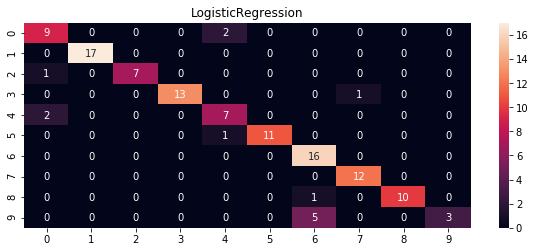

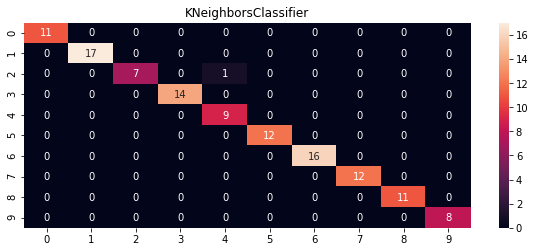

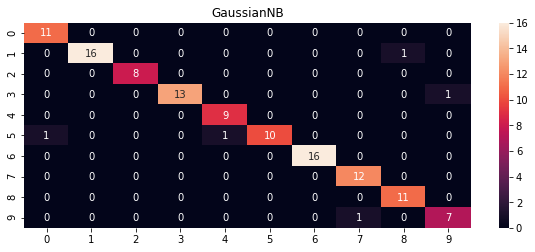

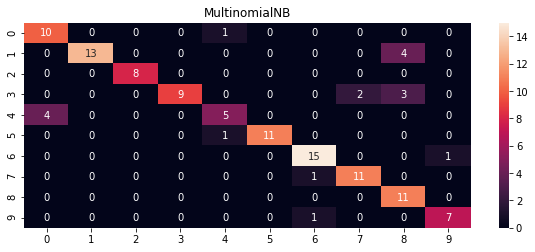

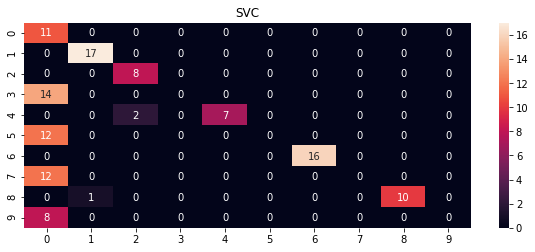

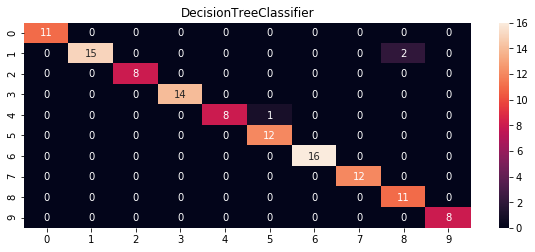

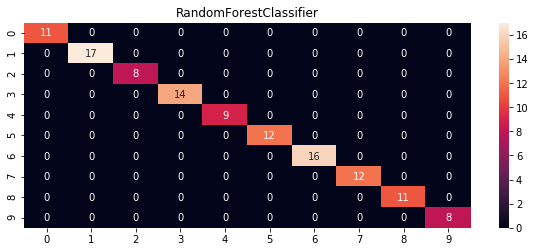

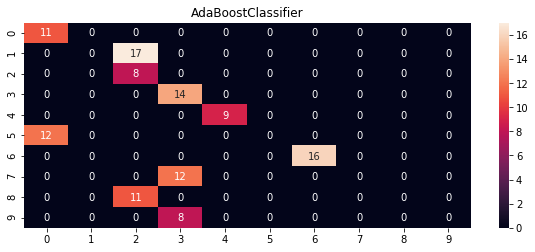

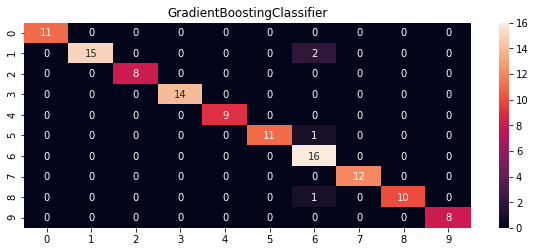

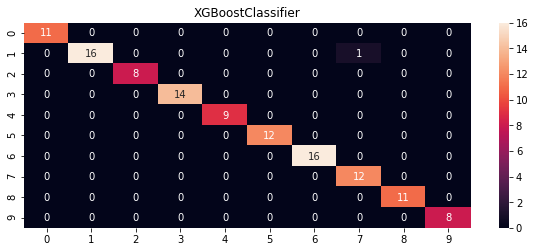

In [219]:
Model = []
score = []
cvs = []
#rocscore = []
for name,model in models:
    print("*****************",name,"******************\n")
    Model.append(name)
    model.fit(X_train,y_train)
    print(model)
    pre = model.predict(X_test)
    print("\n")
    AS = accuracy_score(y_test,pre)
    print("Accuracy Score = ",AS)
    score.append(AS*100)
    print("\n")
    sc = cross_val_score(model,X,y,cv=kf,scoring="accuracy").mean()
    print("Cross val score = ",sc)
    cvs.append(sc*100)
    print("\n")
    #false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    #roc_auc = auc( false_positive_rate, true_positive_rate)
    #print("roc_auc_score = ",roc_auc)
    #rocscore.append(roc_auc*100)
    #print("\n")
    print("Classification Report\n", classification_report(y_test,pre))
    print("\n")
    cm = confusion_matrix(y_test,pre)
    print("Confusion Matrix \n{}".format(cm))
    print("\n")
    plt.figure(figsize = (10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    #plt.subplot(912)
    #plt.title(name)
    #plt.plot(false_positive_rate, true_positive_rate,label = "AUC = %0.2f"% roc_auc)
    #plt.plot([0,1],[0,1],'r--')
    #plt.legend(loc = 'lower right')
    #plt.ylabel("True positive rate")
    #plt.xlabel("False positive rate")
    print("\n\n")

In [207]:
result = pd.DataFrame({"Model": Model, "Accuracy Socre": score, "Cross val score": cvs})
result

,Model,Accuracy Socre,Cross val score
0,LogisticRegression,88.983051,82.312925
1,KNeighborsClassifier,99.152542,96.598639
2,GaussianNB,95.762712,97.108844
3,MultinomialNB,84.745763,82.312925
4,SVC,58.474576,62.074830
5,DecisionTreeClassifier,97.457627,97.789116
6,RandomForestClassifier,100.000000,99.829932
7,AdaBoostClassifier,49.152542,51.700680
8,GradientBoostingClassifier,96.610169,97.959184
9,XGBoostClassifier,99.152542,98.299320


In [208]:
from sklearn.model_selection import GridSearchCV
parameters = {
              'n_estimators': [87,88,89]
             }
grid = GridSearchCV(estimator=RFC,param_grid=parameters)
grid.fit(X_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.n_estimators)
print(grid.best_params_)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=88, n_jobs=None,
                                              oob_score=False,
                                              ran

Random Forest classifier gives the highest accuracy and generalization, so let's save this model

In [220]:
from sklearn.externals import joblib
joblib.dump(RFC,'Avocado_sale_region.csv')

['Avocado_sale_region.csv']